In [1]:
import numpy as np
import pandas as pd
import librosa
import librosa.display
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib import rc #한글깨짐

In [2]:
#한글깨짐
rc('font', family='AppleGothic') 			
plt.rcParams['axes.unicode_minus'] = False  
    

# 데이터 불러오기 

In [3]:
df_voice=pd.read_csv('/Users/yeseulseo/CP2 New/EDA/voice2.csv')

df_voice

,file_name,label,audio_path
0,A_ASH_001.wav,2,/Users/yeseulseo/CP2 New/Train/A/ASH/A_ASH_001...
1,A_ASH_002.wav,2,/Users/yeseulseo/CP2 New/Train/A/ASH/A_ASH_002...
2,A_ASH_003.wav,2,/Users/yeseulseo/CP2 New/Train/A/ASH/A_ASH_003...
3,A_ASH_004.wav,2,/Users/yeseulseo/CP2 New/Train/A/ASH/A_ASH_004...
4,A_ASH_005.wav,2,/Users/yeseulseo/CP2 New/Train/A/ASH/A_ASH_005...
...,...,...,...
4495,S_YSH_026.wav,1,/Users/yeseulseo/CP2 New/Train/S/YSH/S_YSH_026...
4496,S_YSH_027.wav,1,/Users/yeseulseo/CP2 New/Train/S/YSH/S_YSH_027...
4497,S_YSH_028.wav,1,/Users/yeseulseo/CP2 New/Train/S/YSH/S_YSH_028...
4498,S_YSH_029.wav,1,/Users/yeseulseo/CP2 New/Train/S/YSH/S_YSH_029...


## wave

In [20]:
## H(행복) = 0, S(슬픔) = 1, A(화남) = 2, E(당황) = 3, N(중립) = 4
def wave(k,h,title):
    df_emotion=df_voice.loc[df_voice['label']== k ]
    df_emotion.reset_index(inplace=True)
    for j in tqdm(range(0,len(df_emotion),h)):
        y, sr = librosa.load(df_emotion['audio_path'][j])# 소리 파일 불러오기
        wave=librosa.display.waveshow(y, sr = sr) # 소리 데이터를 그래프로 표현하기
        plt.title(title) # 그래프 제목 설정하기
    plt.show( )
    

100%|██████████| 30/30 [00:38<00:00,  1.29s/it]


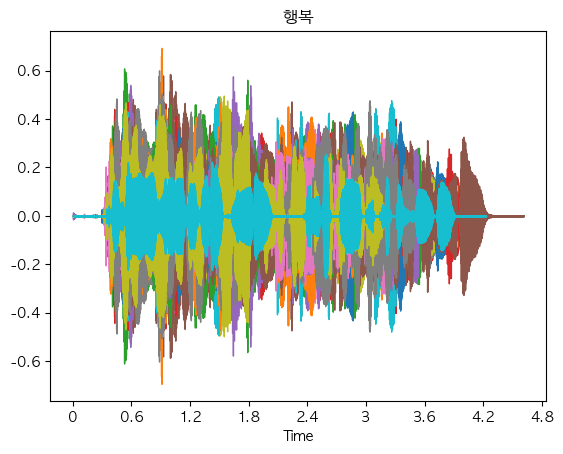

100%|██████████| 30/30 [00:37<00:00,  1.24s/it]


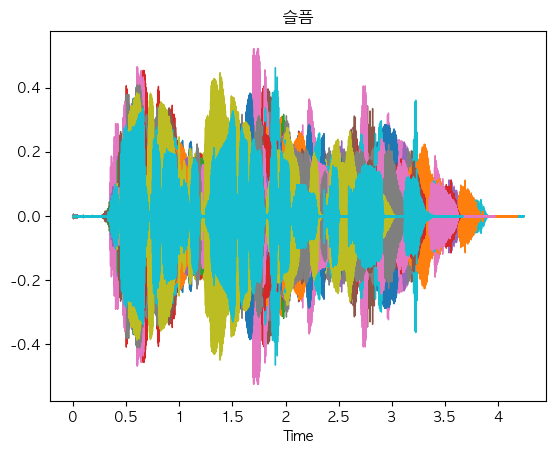

100%|██████████| 30/30 [00:36<00:00,  1.23s/it]


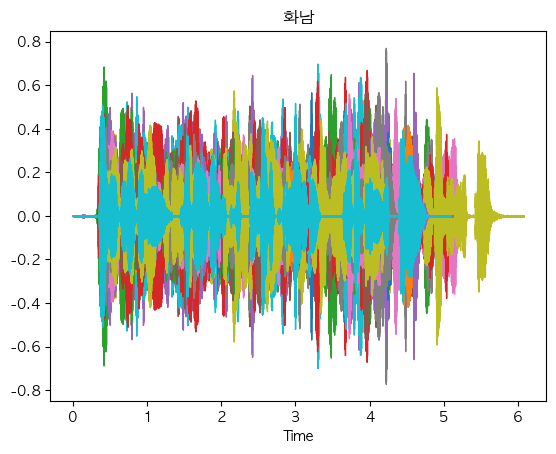

100%|██████████| 30/30 [00:36<00:00,  1.22s/it]


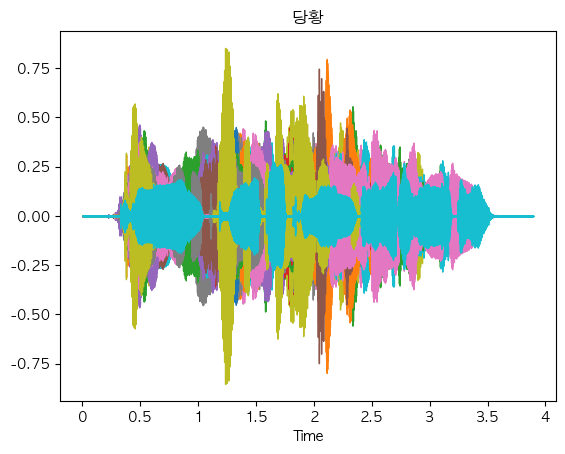

100%|██████████| 30/30 [00:33<00:00,  1.11s/it]


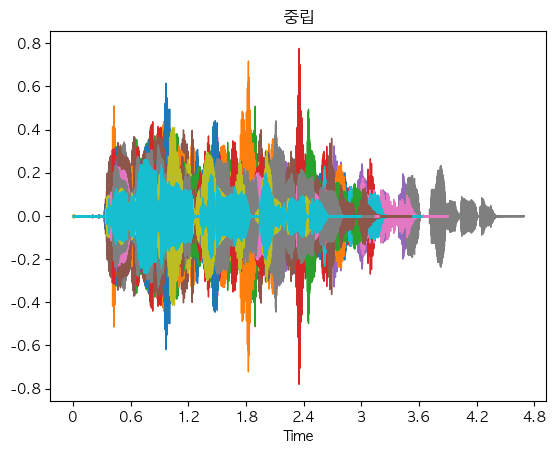

In [22]:
wave(0,30,'행복')
wave(1,30,'슬픔')
wave(2,30,'화남')
wave(3,30,'당황')
wave(4,30,'중립')


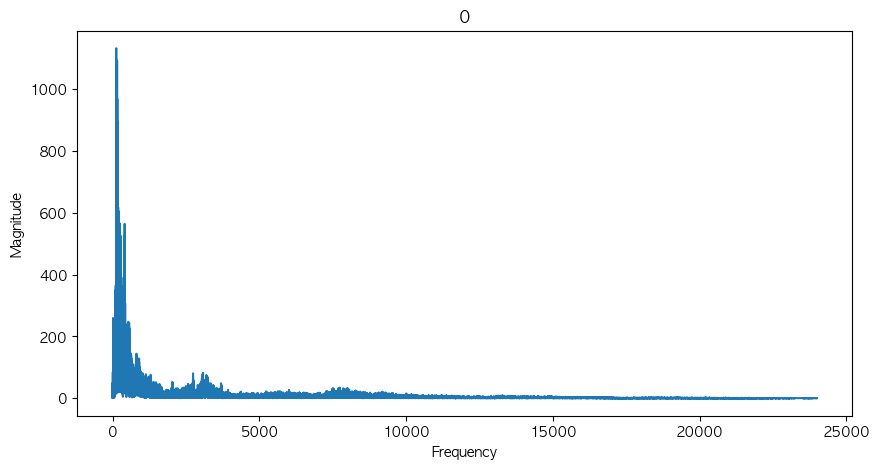

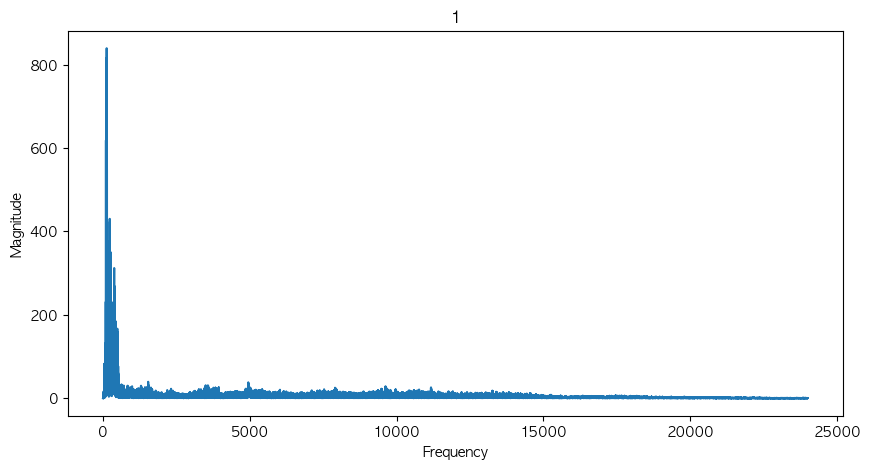

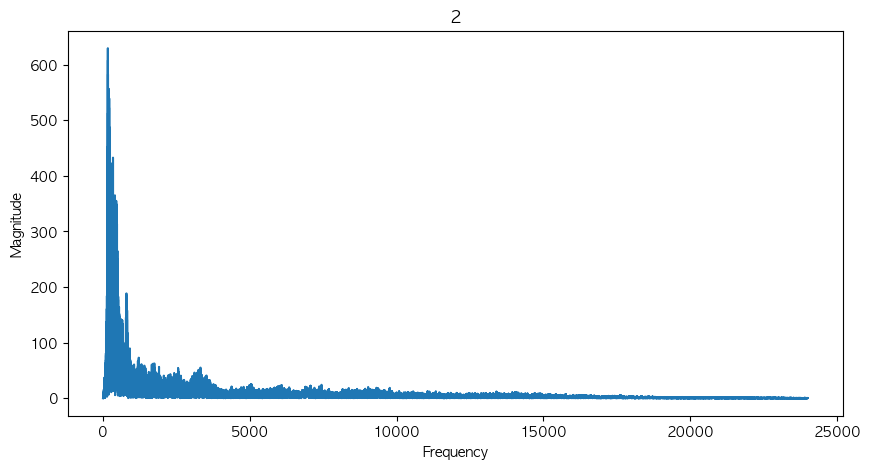

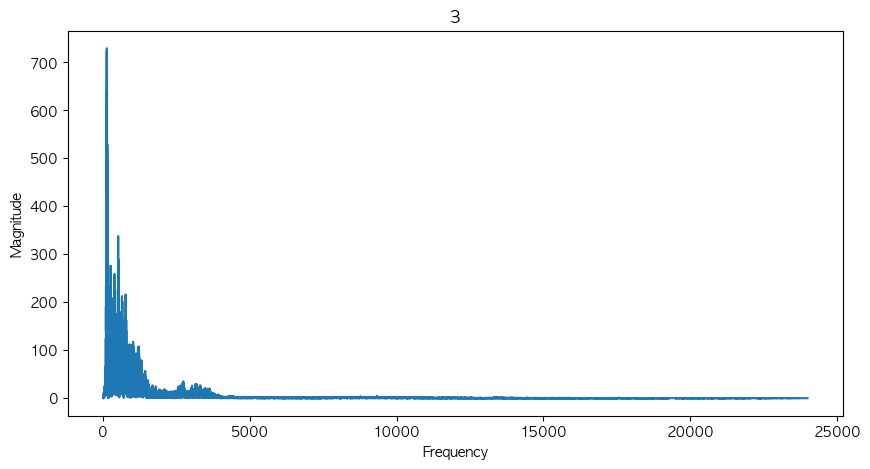

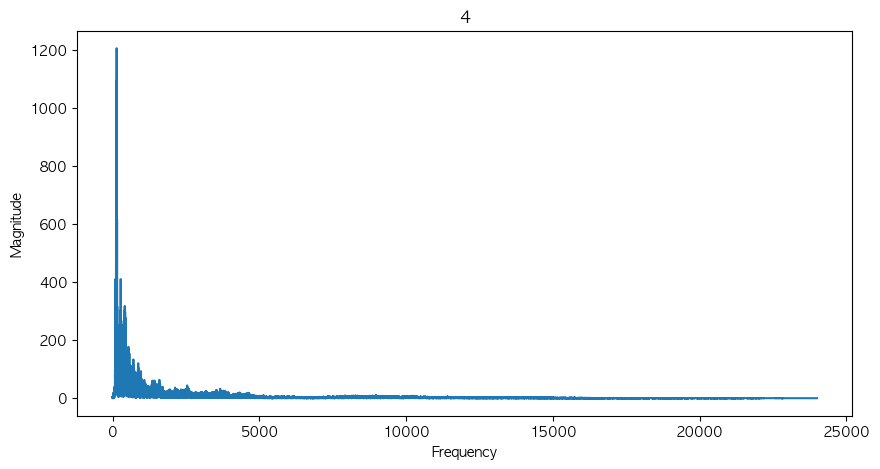

In [4]:
for i in range(5):
    df_emotion1=df_voice.loc[df_voice['label']== i ]
    df_emotion1.reset_index(inplace=True)
    audio_path = df_emotion1['audio_path'][60]
    y2, sr2 = librosa.load(audio_path, sr=None)
    fft = np.fft.fft(y2)

    magnitude = np.abs(fft) 
    frequency = np.linspace(0,sr2,len(magnitude))

    left_spectrum = magnitude[:int(len(magnitude) / 2)]
    left_frequency = frequency[:int(len(frequency) / 2)]

    plt.figure(figsize = (10,5))
    plt.plot(left_frequency, left_spectrum)
    plt.xlabel("Frequency")
    plt.ylabel("Magnitude") # 크기 -> 어떤 주기적 진동의 절대치를 의미
    plt.title(i)
plt.show( )

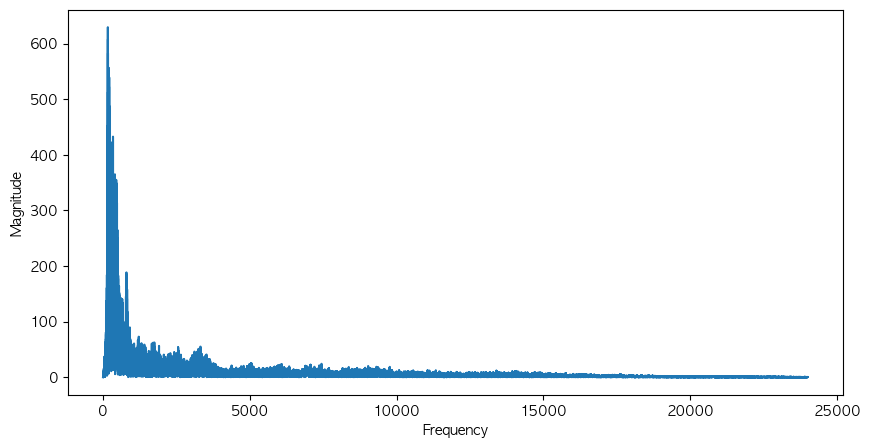

In [13]:
audio_path = df_voice['audio_path'][60]
# audio_path = df_voice['audio_path'][30]
y2, sr2 = librosa.load(audio_path, sr=None)
fft = np.fft.fft(y2)

magnitude = np.abs(fft) 
frequency = np.linspace(0,sr2,len(magnitude))

left_spectrum = magnitude[:int(len(magnitude) / 2)]
left_frequency = frequency[:int(len(frequency) / 2)]

plt.figure(figsize = (10,5))
plt.plot(left_frequency, left_spectrum)
plt.xlabel("Frequency")
plt.ylabel("Magnitude") # 크기 -> 어떤 주기적 진동의 절대치를 의미
        # plt.title()
plt.show( )